In [ ]:
#프로젝트1 - 목표는 MSE 3000 이하

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Iteration 50010 : Loss 2872.4131
Iteration 50020 : Loss 2872.4115
Iteration 50030 : Loss 2872.4099
Iteration 50040 : Loss 2872.4083
Iteration 50050 : Loss 2872.4067
Iteration 50060 : Loss 2872.4051
Iteration 50070 : Loss 2872.4034
Iteration 50080 : Loss 2872.4018
Iteration 50090 : Loss 2872.4002
Iteration 50100 : Loss 2872.3986
Iteration 50110 : Loss 2872.3970
Iteration 50120 : Loss 2872.3954
Iteration 50130 : Loss 2872.3938
Iteration 50140 : Loss 2872.3922
Iteration 50150 : Loss 2872.3906
Iteration 50160 : Loss 2872.3890
Iteration 50170 : Loss 2872.3874
Iteration 50180 : Loss 2872.3857
Iteration 50190 : Loss 2872.3841
Iteration 50200 : Loss 2872.3825
Iteration 50210 : Loss 2872.3809
Iteration 50220 : Loss 2872.3793
Iteration 50230 : Loss 2872.3777
Iteration 50240 : Loss 2872.3761
Iteration 50250 : Loss 2872.3745
Iteration 50260 : Loss 2872.3729
Iteration 50270 : Loss 2872.3713
Iteration 50280 : Loss 2872.3697
Iteration 50290 : Loss 2872.3681
Iterati

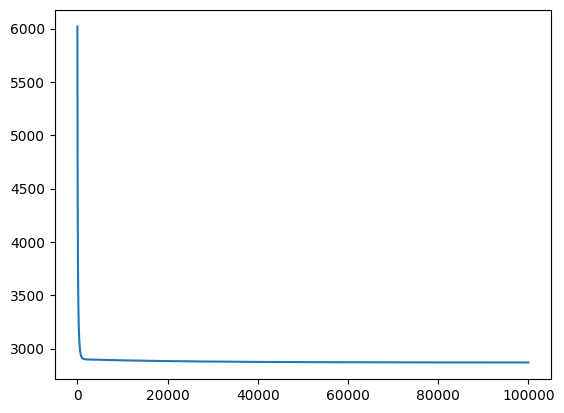

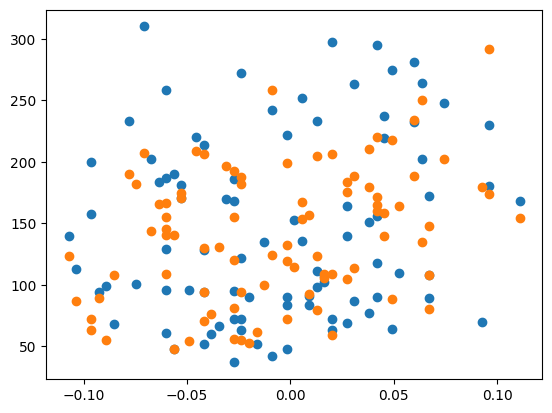

In [3]:
import numpy as np
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

X = np.array(df_X)
y = np.array(df_y)

# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#모델 준비하기
W = np.random.rand(10)
b = np.random.rand()
def model(X,W,b):
  predictions = 0
  for i in range(10):
    predictions += X[:,i]*W[i]
  predictions += b
  return predictions

def MSE(a,b):
  mse = ((a-b)**2).mean()
  return mse

def loss(X,W,b,y):
  predictions = model(X,W,b)
  L = MSE(predictions, y)
  return L

# 기울기
def gradient(X, W, b, y):
# N은 데이터 포인트의 개수
  N = len(y)
  y_pred = model(X, W, b)
  dW = 1/N * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dW, db
LEARNING_RATE = 0.5  #임의로 주는 값

losses = []

for i in range(1, 100001):
  dW, db = gradient(X_train, W, b, y_train)
  W -= LEARNING_RATE * dW
  b -= LEARNING_RATE * db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 10 == 0:
    print('Iteration %d : Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse
#(11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()